In [1]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import *

In [2]:
import urllib.request
import zipfile
url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip"
file_name = "horse-or-human.zip"
training_dir = 'horse-or-human/training/'
urllib.request.urlretrieve(url, file_name)

zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen = tf.keras.preprocessing.image.ImageDataGenerator(1./255)

training_gen = training_datagen.flow_from_directory(
    training_dir, 
    target_size = (300, 300),
    class_mode = 'binary',)

Found 1027 images belonging to 2 classes.


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu' ,
    input_shape=(300, 300, 3)),
    
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [5]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = 0.001),
loss = "binary_crossentropy", metrics = ['accuracy'])

In [6]:
history = model.fit_generator(training_gen, epochs = 50)

C:\Users\kzhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\kzhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
Epoch 1/50
33/33 [==============================] - 36s 1s/step - loss: 12.0690 - accuracy: 0.5576
Epoch 2/50
33/33 [==============================] - 36s 1s/step - loss: 0.6280 - accuracy: 0.8200
Epoch 3/50
33/

In [7]:
validation_url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip"

validation_file_name = "validation-horse-or-human.zip"
validation_dir = 'horse-or-human/validation/'

urllib.request.urlretrieve(validation_url, validation_file_name)
zip_ref = zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()

In [13]:

training_datagen = tf.keras.preprocessing.image.ImageDataGenerator(1./255)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(1./255)

training_gen = training_datagen.flow_from_directory(
    training_dir,
    target_size = (300, 300), shuffle = True, batch_size = 64)

validation_gen = validation_datagen.flow_from_directory(
    validation_dir, 
    target_size = (300, 300),
    class_mode = 'binary')

epochs = 15

history = model.fit_generator(
    training_gen, validation_data = validation_gen, 
    epochs = epochs)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
C:\Users\kzhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
C:\Users\kzhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
Epoch 1/15
13/17 [=====================>........] - ETA: 8s - loss: 3.8719 - accuracy: 0.5000 

KeyboardInterrupt: 

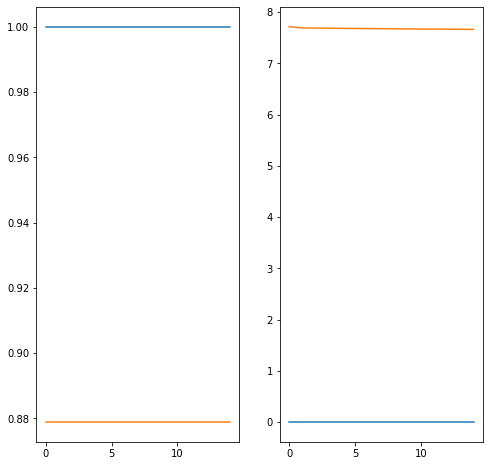

In [12]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = "Training Loss")
plt.plot(epochs_range, val_loss, label = "Validation Loss")